# Correlation

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import psycopg2

In [8]:
import opendatasets as od
import pandas
  
od.download("https://www.kaggle.com/competitions/titanic/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aneeshabsoman
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 1.61MB/s]


Extracting archive .\titanic/titanic.zip to .\titanic


In [14]:
# reading the XLSX file
file =('titanic/train.csv')
df = pd.read_csv(file)

In [15]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
df=df.dropna(axis=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


**Pearsons Correlation**

In [19]:
import scipy.stats
x = df['Fare']
y = df['Age']
pearsoncorr=scipy.stats.pearsonr(x, y)    
pearsoncorr

(-0.09242385620999949, 0.2133579474511106)

The correlation coefficient,
The student t test, 2 tailed p-value

we conclude that there is not a significant linear correlation between x and y in the population


the correlation coeffiecient measures the strength of a relationship in samples only



<AxesSubplot:>

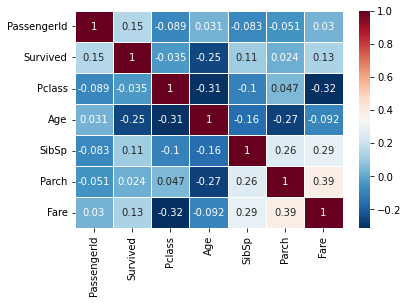

In [20]:
pearsoncorr = df.corr(method='pearson')

import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

**Spearmans correlation**

In [46]:
from scipy.stats import spearmanr

df=pd.read_excel('Random_Survey_Data.xlsx')
df=df.dropna(axis=0)
df.head(2)

,Design - I easily understood how to use the product.,Design - I had no trouble installing the product.,Design - The product's design is unintuitive.,id,price,Delivery_time
0,Strongly Disagree,Strongly Agree,Disagree,Respondent #1,7.2500,< 30 Minutes
1,Disagree,Agree,Neutral,Respondent #2,71.2833,30 minutes — 1 Hour


In [47]:
x = df['Design - I easily understood how to use the product.']
y = df['price']

# calculate spearman's correlation
coef, p = spearmanr(x,y)
print(coef)
print(p)

0.06679310351936234
0.5883811486812994


we conclude that there is not a significant linear correlation between x and y in the population


In [48]:
import pandas as pd
import scipy.stats

 
# Create a function that takes in x's and y's
def spearmans_rank_correlation(x, y):
     
    # Calculate the rank of x's
    xranks = pd.Series(x).rank()
    print("Rankings of X:")
    print(xranks)
     
    # Calculate the ranking of the y's
    yranks = pd.Series(y).rank()
    print("Rankings of Y:")
    print(yranks)
     
    # Calculate Pearson's correlation coefficient on the ranked versions of the data
    print("Spearman's Rank correlation:",scipy.stats.pearsonr(xranks, yranks)[0])

#Call the function
spearmans_rank_correlation(x, y)

Rankings of X:
0     46.0
1     10.0
2     46.0
3      2.5
4     10.0
      ... 
63    46.0
64    46.0
65    46.0
66    46.0
67    46.0
Name: Design - I easily understood how to use the product., Length: 68, dtype: float64
Rankings of Y:
0      6.0
1     62.0
2     15.0
3     60.0
4     18.5
      ... 
63    48.0
64    45.5
65    31.0
66    25.0
67    21.0
Name: price, Length: 68, dtype: float64
Spearman's Rank correlation: 0.06679310351936235


**Kendall**

In [49]:
from scipy.stats import kendalltau

x = df['Design - I easily understood how to use the product.']
y = df['Delivery_time']

# Calculating Kendall Rank correlation
corr, p = kendalltau(x, y)
print(corr)
print(p)

-0.005370282510720448
0.9610598171011031


**Point Biserial**

In [51]:
file =('titanic/train.csv')
df = pd.read_csv(file)

df['Survived']=df['Survived'].astype('object')
print("datatype of fare is",df['Fare'].dtypes)
print("datatype of survived is",df['Survived'].dtypes)
print("unique values in suvived is" ,df['Survived'].unique())

datatype of fare is float64
datatype of survived is object
unique values in suvived is [0 1]


In [52]:
from scipy.stats import pointbiserialr

x = df['Fare']
y = df['Survived']

pbc = pointbiserialr(x,y)
print(pbc)

PointbiserialrResult(correlation=0.2573065223849623, pvalue=6.12018934191834e-15)


If the p-value is LESS THAN . 05, then its evidence of a statistically significant bivariate association between the two continuous variables. 

**Chi Squared Test**

In [53]:
file =('titanic/train.csv')
df = pd.read_csv(file)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
from scipy.stats import chi2_contingency 
import scipy.stats as stats

x=df['Survived']
y=df['Sex']
contingency = pd.crosstab(x,y)
contingency

Sex,female,male
Survived,,
0,81,468
1,233,109


In [55]:
val = stats.chi2_contingency(contingency)
val

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

first value is the chi-square statistic 

second value  is the p-value
    
third value is the degrees of freedom

In [56]:
stat=13031.55
p=0.0
dof=len(df)-1
significance_level=0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS') 

p value: 0.0
Reject NULL HYPOTHESIS


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

A low value for chi-square means there is a high correlation between your two sets of data. 